# Homework 1 - Alexander Ilyin CSE258

# Question 1 Part 1

,star_rating,count
0,1,4766
1,2,1560
2,3,3147
3,4,9808
4,5,129029


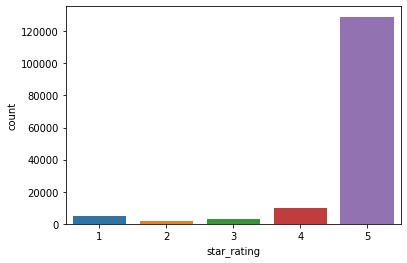

In [197]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

amazon = pd.read_csv('amazon_reviews_us_Gift_Card_v1_00 (2).tsv', sep='\t')

ratings_count = amazon.groupby('star_rating').star_rating.agg('count').to_frame('count').reset_index()
sns.barplot(x="star_rating", y="count", data=ratings_count)
ratings_count

# Part 2(a) - Verified Reviews

,star_rating,count
0,1,3977
1,2,1335
2,3,2775
3,4,8890
4,5,118312


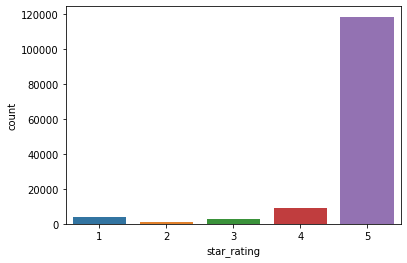

In [198]:
amazon_verified = amazon[amazon.verified_purchase == 'Y']
verified_ratings_count = amazon_verified.groupby('star_rating').star_rating.agg('count').to_frame('count').reset_index()
sns.barplot(x="star_rating", y="count", data=verified_ratings_count)
verified_ratings_count

# Part 2(b) - Un-Verified Reviews

,star_rating,count
0,1,789
1,2,225
2,3,372
3,4,918
4,5,10717


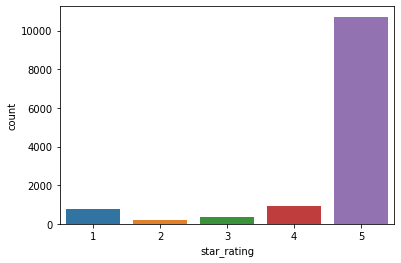

In [199]:
amazon_unverified = amazon[amazon.verified_purchase == 'N']
unverified_ratings_count = amazon_unverified.groupby('star_rating').star_rating.agg('count').to_frame('count').reset_index()
sns.barplot(x="star_rating", y="count", data=unverified_ratings_count)
unverified_ratings_count

# Part 3

In [200]:
amazon['review_body'] = amazon['review_body'].astype(str)
amazon['review_length'] = amazon['review_body'].apply(len)
amazon_list = amazon[['verified_purchase', 'review_length', 'star_rating']].values.tolist()

def feature(data):
    feat = [1]
    if data[0] == 'Y':
        feat.append(1)
        feat.append(data[1])
    else:
        feat.append(0)
        feat.append(data[1])
    return feat

X = [feature(i) for i in amazon_list]
y = [amazon_list[i][2] for i in range(len(amazon_list))]
theta, residuals, rank, s = np.linalg.lstsq(X,y)
theta

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


array([ 4.84503535e+00,  4.98577544e-02, -1.24545535e-03])

Explanation for Part 3: 
From the results printed above, we can see that the coefficient from "review is verified" is positive. Based on what we know about regression, this seems to suggest that the fact  that a review is made by a verified purchaser has a positive correlation to the star rating. However, the coefficient for review length is negative, which seems to suggest that longer review have a negative effect on star_rating. Intuitively, this makes sense, since someone who is angry will probably have more to say about a product. 

# Part 4

In [201]:
amazon['review_body'] = amazon['review_body'].astype(str)
amazon['review_length'] = amazon['review_body'].apply(len)
amazon_list = amazon[['verified_purchase', 'star_rating']].values.tolist()

def feature(data):
    feat = [1]
    if data[0] == 'Y':
        feat.append(1)
    else:
        feat.append(0)
    return feat

X = [feature(i) for i in amazon_list]
y = [amazon_list[i][1] for i in range(len(amazon_list))]
theta, residuals, rank, s = np.linalg.lstsq(X,y)
theta

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


array([4.578143  , 0.16793392])

Explanation for part 4: Interestingly enough, the coefficient for "review is verified" increased from the previous problem. Considering the fact that the only change from the previous regression is the absence of the "review length" feature, we can say that "review length" probably has a strong effect on the regression. Since the verified review coefficient increased, we can confirm our notion that review length has a negative effect on the regression.

# Part 5

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train = X[:int(len(X)*.90)] 
X_test = X[-int(.10*len(X)):]
y_train = y[:int(.90*len(y))]
y_test = y[-int(.10*len(y)):] 
theta, residuals, rank, s = np.linalg.lstsq(X_train, y_train)
theta

mse_train = 0 
for i in range(len(y_train)):
    mse_train = mse_train + (y_train[i]-(X_train[i][1]*theta[1]+theta[0]))**2
mse_train = mse_train/len(y_train)

mse_test = 0 
for i in range(len(y_test)):
    mse_test = mse_test + (y_test[i]-(X_test[i][1]*theta[1]+theta[0]))**2
mse_test = mse_test/len(y_test)

print("The training and test MSE's are: ") 
print(mse_train, mse_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


The training and test MSE's are: 
0.655484219671073 0.9723851990306185


# Part 6

In [203]:
mae_test = 0
for i in range(len(y_test)):
    mae_test = mae_test + abs(y_test[i]-(X_test[i][1]*theta[1]+theta[0]))
mae_test = mae_test/len(y_test)

r_square = 1-(mse_test/np.var(y_test))
print(mae_test, r_square)

0.6221007247320745 -0.04811587359382474


# Part 7

In [204]:
df = pd.DataFrame(columns=['mse_train', 'mse_test', 'train_size'])
size = .05
while size <= .96:
    X_train = X[:int(len(X)*size)] 
    X_test = X[-int((1-size)*len(X)):]
    y_train = y[:int(size*len(y))]
    y_test = y[-int((1-size)*len(y)):] 
    theta, residuals, rank, s = np.linalg.lstsq(X_train, y_train)

    mse_train = []
    for i in range(len(y_train)):
        mse_train.append((y_train[i]-(X_train[i][1]*theta[1]+theta[0]))**2)
    mse_train = sum(mse_train)/len(y_train)

    mse_test = []
    for i in range(len(y_test)):
        mse_test.append((y_test[i]-(X_test[i][1]*theta[1]+theta[0]))**2)
    mse_test = sum(mse_test)/len(y_test)

    size = size+.05
    
    df = df.append({'mse_train': mse_train,
                   'mse_test': mse_test,
                   'train_size': len(X_train)}, ignore_index=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


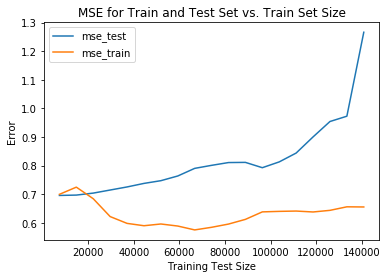

In [205]:
plt.plot('train_size', 'mse_test', data=df)
plt.plot('train_size', 'mse_train', data=df)
plt.title('MSE for Train and Test Set vs. Train Set Size')
plt.xlabel('Training Test Size')
plt.ylabel('Error')
plt.legend()
plt.show()

Explanation for part 7: As shown in the graph above, training test size does have a impact on the performance of our model. The graph above is a good visualization of overfitting, since as the training size reaches its maximum, so does the MSE for the test. If the training set is too large, the model would get a biased view of the data it trains on. Of course, the challenge with training models is making sure the data sees the correct proportion of training and test data, and that the two sets do not overlap. It also makes sense that the train error decreases slightly as the training set increases. However, the interesting thing about this data set is the fact that most ratings are 5 star, meaning that you would get a pretty decent accuracy just predicting 5 stars. With a different data set, the results might change. 

# Question 2 Part 1

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

amazon['review_body'] = amazon['review_body'].astype(str)
amazon['review_length'] = amazon['review_body'].apply(len)
amazon_list = amazon[['verified_purchase', 'star_rating', 'review_length']].values.tolist()

def feature(data):
    feat = [1]
    feat.append(data[1])
    feat.append(data[2])
    return feat

X = [feature(i) for i in amazon_list]
y = [1 if amazon_list[i][0] == 'Y' else 0 for i in range(len(amazon_list))]

X_train = X[:int(len(X)*.90)] 
X_test = X[-int(.10*len(X)):]
y_train = y[:int(.90*len(y))]
y_test = y[-int(.10*len(y)):] 

reg = LogisticRegression(fit_intercept=False)
reg.fit(X_train, y_train)
train_predictions = reg.predict(X_train)
test_predictions = reg.predict(X_test)

accuracy = sum(test_predictions == y_test) / len(y_test)
verified_proportion = sum(y)/len(y)
positive_predictions = sum(test_predictions)/len(test_predictions)
print(f"The accuracy of the model is {accuracy}")
print(f"The actual proportion of verified purchases is {verified_proportion}")
print(f"The proportion of predictions that are verified is {positive_predictions}")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the model is 0.559840873845324
The actual proportion of verified purchases is 0.9122041669476098
The proportion of predictions that are verified is 0.9990560312858202


## Part 2 - Testing different models

In [207]:
accuracy_tracker = pd.DataFrame(columns=['columns_used', 'accuracy'])

In [208]:
import datetime

amazon['review_date'] = pd.to_datetime(amazon['review_date'], format='%Y-%m-%d')
amazon['holiday_season'] = 'n/a'
amazon['not_holiday_season'] = 'n/a'
for i in range(len(amazon)):
    if amazon['review_date'][i].month in [11,12,1]:
        amazon['holiday_season'][i] = 1
        amazon['not_holiday_season'][i] = 0
    else:
        amazon['holiday_season'][i] = 0
        amazon['not_holiday_season'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-p

In [211]:
amazon['controversial'] = 'n/a'
for i in range(len(amazon)):
    if amazon['helpful_votes'][i] - amazon['total_votes'][i] < -5:
        amazon['controversial'][i] = 1
    else: 
        amazon['controversial'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [245]:
## Question 2 Part 2
columns_list = ['verified_purchase', 'not_holiday_season', 'review_length', 'star_rating', 'controversial']
amazon_list = amazon[columns_list].values.tolist()

def feature(data):
    feat = [1]
    feat.append(data[1])
    feat.append(data[2])
    feat.append(data[3])
    feat.append(data[4])
    return feat

X = [feature(i) for i in amazon_list]
y = [amazon_list[i][0] for i in range(len(amazon_list))]

X_train = X[:int(len(X)*.90)] 
X_test = X[-int(.10*len(X)):]
y_train = y[:int(.90*len(y))]
y_test = y[-int(.10*len(y)):] 

reg = LogisticRegression(fit_intercept=False)
reg.fit(X_train, y_train)
train_predictions = reg.predict(X_train)
test_predictions = reg.predict(X_test)
accuracy = sum(test_predictions == y_test) / len(y_test)

accuracy_tracker = accuracy_tracker.append({'columns_used': columns_list,
                                 'accuracy': accuracy}, ignore_index=True)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [246]:
accuracy_tracker

,columns_used,accuracy
0,"[verified_purchase, not_holiday_season]",0.559571
1,"[verified_purchase, not_holiday_season, contro...",0.559571
2,"[verified_purchase, holiday_season]",0.559571
3,"[verified_purchase, holiday_season, review_len...",0.559571
4,"[verified_purchase, holiday_season, star_rating]",0.559571
5,"[verified_purchase, holiday_season, star_ratin...",0.559571
6,"[verified_purchase, holiday_season, star_ratin...",0.559773
7,"[verified_purchase, holiday_season, star_rating]",0.559571
8,"[verified_purchase, holiday_season, controvers...",0.559571
9,"[verified_purchase, controversial]",0.559571


(0.5, 0.6)

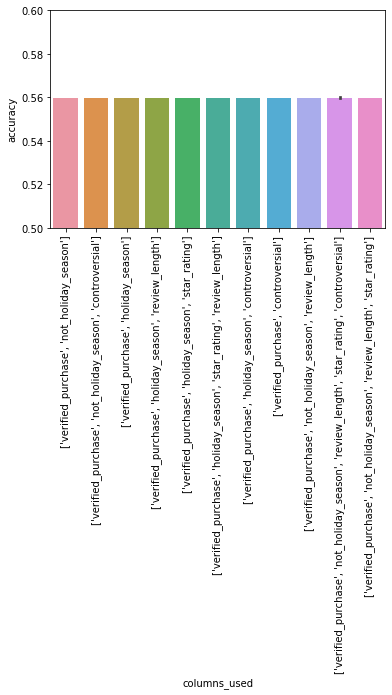

In [251]:
accuracy_tracker['columns_used'] = accuracy_tracker['columns_used'].astype(str)
sns.barplot(x="columns_used", y="accuracy", data=accuracy_tracker)
plt.xticks(rotation=90)
plt.ylim(.5, .6)

Explanation for part 2: I attempted to train a couple of different models. My first intuition was to see the effect of the date on the verified status of the review. I tested to see if the range was in the holiday season or not, and then tested that model. I then realized that most people would probably be receiving giftcards as gifts, and therefore would not be reviewing as verified "purchasers". I tried both options, but neither seemed to have a sizeable effect on the verified status. Another intuition I had was to try to manipulate the two vote counter columns. I subtracted the helpful votes from total votes, and created a controversial votes column, to track which votes had a relatively high amount of negative votes. The reason these models probably did not perform well is because the correlation I had assumed for holiday season and "controversial" reviews is not as high as I initially thought. Another reason that the models are not so successful, is the fact that the data is not random. Since we have never shuffled the data, there is huge amounts of bias with the data ordered by timeThe highest accuracy I got was .56, when using the combination [not_holiday_season, review_length, controversial, star_rating]